# Data Analysis 

In [1]:
# imports
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import nltk
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
# %matplotlib inline
# plt.rcParams["patch.force_edgecolor"] = True

In [2]:
# Read the Dataset
data = pd.read_csv("wine_data.csv", encoding='ISO-8859-1')

### Understand The Data 
To get a sense of the distribution of the data, we will get the statistical lineage, the info, the head and tail, and inspect their attributes.  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     187 non-null    int64  
 1   points    187 non-null    int64  
 2   variety   187 non-null    object 
 3   winery    187 non-null    object 
 4   province  187 non-null    object 
 5   country   187 non-null    object 
 6   lat       187 non-null    float64
 7   lng       187 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 8.8+ KB


In [4]:
data.head()

,price,points,variety,winery,province,country,lat,lng
0,85,97,Cabernet Sauvignon,Abeja,Washington,US,46.087349,-118.225523
1,130,97,Cabernet Sauvignon,Alpha Omega,California,US,38.470709,-122.428425
2,125,97,Sangiovese,Altesino,Tuscany,Italy,43.102726,11.491383
3,115,97,Red Blend,Antinori,Tuscany,Italy,43.612757,11.191307
4,90,97,Pinot Noir,Arista,California,US,38.524215,-122.867989


In [6]:
data.tail()

,price,points,variety,winery,province,country,lat,lng
182,82,97,Pinot Noir,Williams Selyem,California,US,38.521183,-122.866156
183,85,97,Pinot Noir,Williams Selyem,California,US,38.521183,-122.866156
184,95,97,Pinot Noir,Williams Selyem,California,US,38.521183,-122.866156
185,125,97,Pinot Noir,Williams Selyem,California,US,38.521183,-122.866156
186,625,97,Cabernet Sauvignon,Yao Ming,California,US,38.288445,-122.289419


In [7]:
data.describe()

,price,points,lat,lng
count,187.000000,187.0,187.000000,187.000000
mean,184.700535,97.0,38.770223,-47.402547
std,153.232714,0.0,17.078880,74.618569
min,42.000000,97.0,-36.060885,-123.430194
25%,85.000000,97.0,38.500587,-122.399364
50%,130.000000,97.0,43.046353,-4.148166
75%,227.000000,97.0,45.405816,8.033845
max,1100.000000,97.0,52.904592,146.451840


### Accessing The Data

Instead of accessing the bulk of the data, we may need to access each winery individually based on variety, price, province, and/or country.



In [8]:
#Accessing each Winery

wine_province = data['province'].tolist()
price = data['price'].tolist()
wine_variety = data['variety'].tolist()
winery = data['winery'].tolist()
#vintage = cab_df['Vintage'].tolist()

cabs = list(zip(price, wine_province, wine_variety, winery))
cabs[70]


(190, 'California', 'Cabernet Sauvignon', 'Gandona')

In [9]:
# Accessing Each Province.
label_words = data['province'].str.split(' ').tolist()
label_words[80]

['California']

[Text(0, 0, 'US'),
 Text(1, 0, 'France'),
 Text(2, 0, 'Italy'),
 Text(3, 0, 'Australia'),
 Text(4, 0, 'Spain'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Portugal'),
 Text(7, 0, 'Austria'),
 Text(8, 0, 'Argentina')]

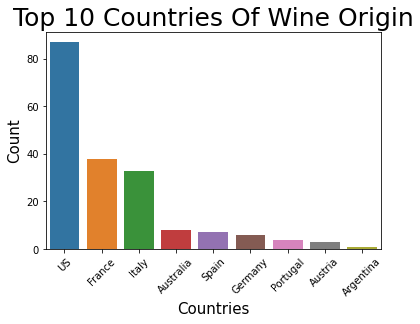

In [10]:
country = data.country.value_counts()[:10].sort_values(ascending=False)
country_plot = sns.countplot(x='country', data=data[data.country.isin(country.index.values)], order=country.index)
country_plot.set_title("Top 10 Countries Of Wine Origin", fontsize=25)
country_plot.set_xlabel("Countries", fontsize=15)
country_plot.set_ylabel("Count", fontsize=15)
country_plot.set_xticklabels(country.index,rotation=45)

In [11]:
### Visualization Distributions
As seen in the results of the describe method, the price has a wide distribution, and we can explore this visually with the histogram plots.  

SyntaxError: invalid syntax (<ipython-input-11-1fd7e5cae87b>, line 2)

Text(0.5, 1.0, 'Histogram of Wine Prices')

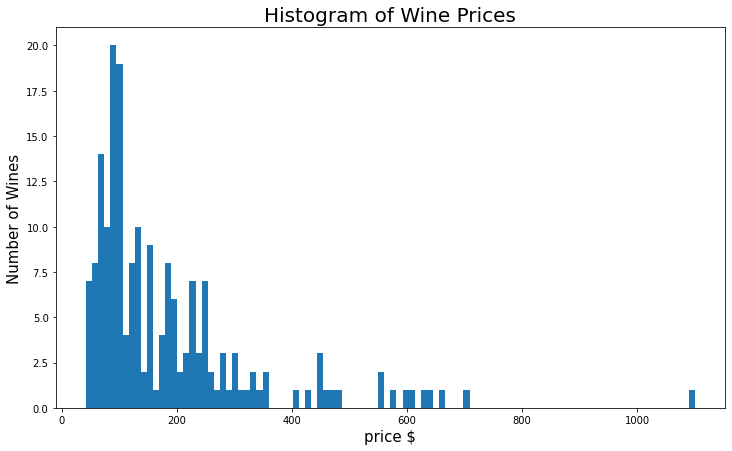

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
data['price'].plot.hist(bins=100)
plt.xlabel('price $', fontsize=15)
plt.ylabel('Number of Wines', fontsize=15)
plt.title('Histogram of Wine Prices', fontsize=20)

Text(0, 0.5, '% of Wines')

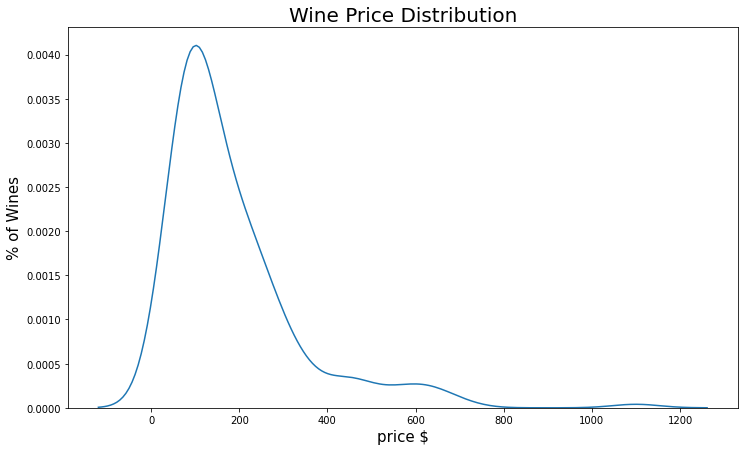

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(data.price)
plt.title('Wine Price Distribution', fontsize=20)
plt.xlabel('price $', fontsize=15)
plt.ylabel('% of Wines', fontsize=15)

### Making the cut
Based on the plots above, it seems like a good idea to restrict the dataset only to wines with price < $1000. 

In [14]:
data1 = data[data['price']<1000]
data1

,price,points,variety,winery,province,country,lat,lng
0,85,97,Cabernet Sauvignon,Abeja,Washington,US,46.087349,-118.225523
1,130,97,Cabernet Sauvignon,Alpha Omega,California,US,38.470709,-122.428425
2,125,97,Sangiovese,Altesino,Tuscany,Italy,43.102726,11.491383
3,115,97,Red Blend,Antinori,Tuscany,Italy,43.612757,11.191307
4,90,97,Pinot Noir,Arista,California,US,38.524215,-122.867989
...,...,...,...,...,...,...,...,...
182,82,97,Pinot Noir,Williams Selyem,California,US,38.521183,-122.866156
183,85,97,Pinot Noir,Williams Selyem,California,US,38.521183,-122.866156
184,95,97,Pinot Noir,Williams Selyem,California,US,38.521183,-122.866156
185,125,97,Pinot Noir,Williams Selyem,California,US,38.521183,-122.866156


In [15]:
data1.describe()

,price,points,lat,lng
count,186.00000,186.0,186.000000,186.000000
mean,179.77957,97.0,38.737714,-47.654143
std,138.03744,0.0,17.119175,74.740394
min,42.00000,97.0,-36.060885,-123.430194
25%,85.00000,97.0,38.500584,-122.399696
50%,130.00000,97.0,43.042825,-4.148166
75%,226.50000,97.0,45.461179,8.057430
max,698.00000,97.0,52.904592,146.451840


Text(0.5, 1.0, 'Histogram of Wine Prices')

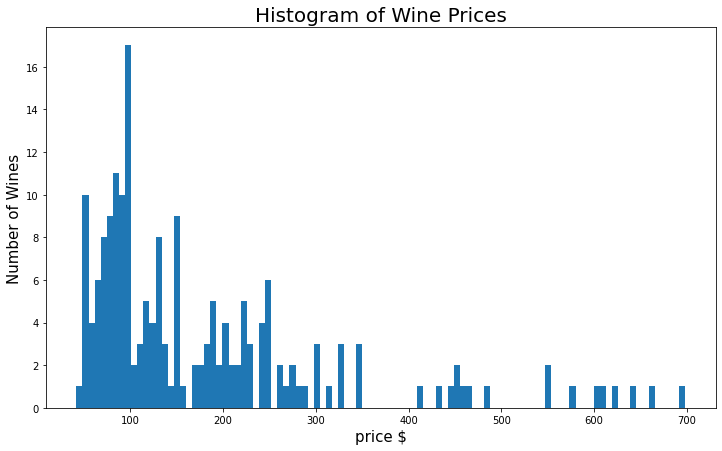

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
data1['price'].plot.hist(bins=100)
plt.xlabel('price $', fontsize=15)
plt.ylabel('Number of Wines', fontsize=15)
plt.title('Histogram of Wine Prices', fontsize=20)

In [17]:
The data appears to be normally distributed by restricting the price to less than a "$" 1000.

SyntaxError: invalid syntax (<ipython-input-17-94bc478b0914>, line 1)

In [18]:
### Wine vs. Province
Since we have modified the dataset, let's now explore further the wines by province. 

SyntaxError: invalid syntax (<ipython-input-18-fcaf9229a160>, line 2)

In [19]:
province_1 = pd.DataFrame(data1.groupby(['province'])['price'].mean())
province_1.columns = ['AvgPrice']

province_2 = pd.DataFrame(data1['province'].value_counts())
province_2.columns=['Wine Count']

province_df = pd.concat([province_1, province_2], axis=1)
province_df

,AvgPrice,Wine Count
Alsace,269.000000,1
Bordeaux,274.857143,14
Burgenland,108.666667,3
Burgundy,369.357143,14
California,122.027778,72
Champagne,250.857143,7
Douro,100.000000,1
Levante,88.000000,1
Mendoza Province,120.000000,1
Mosel-Saar-Ruwer,250.000000,2


Text(0.5, 1.0, 'Average Price by Province')

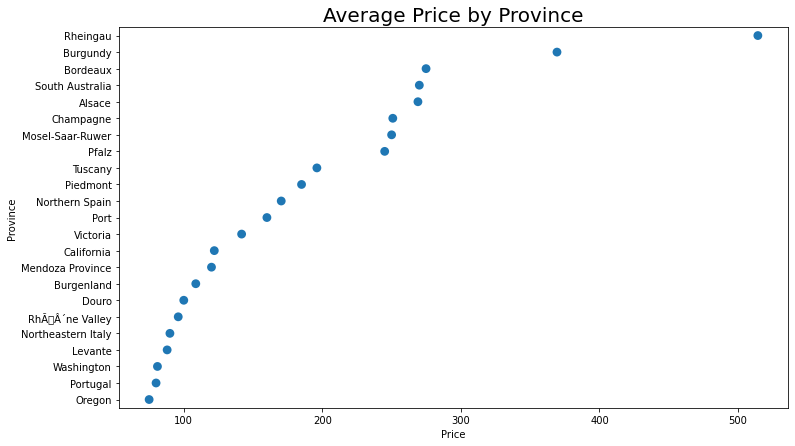

In [17]:
province_df = province_df.reset_index().sort_values('AvgPrice', ascending=False)
province_df.columns=['Province', 'Price', 'WineCount']

fig, ax = plt.subplots(figsize=(12,7))
sns.pointplot(x='Price', y='Province', data=province_df, join=False, ci=None)
plt.title('Average Price by Province', fontsize=20)

### Ratings
Do ratings correspond with higher prices in our dataset? Let's take a closer look.

In [20]:
ratings = pd.DataFrame(data1.groupby(['points'])['price'].mean())
ratings.columns = ['AvgPrice']

ratings_2 = pd.DataFrame(data1['points'].value_counts())
ratings_2.columns=['Wine Count']

ratings_df = pd.concat([ratings, ratings_2], axis=1)
ratings_df

,AvgPrice,Wine Count
97,179.77957,186


In [21]:
The unique point value appears to skew the data. Had we have different point values, we would have had a better understaing of the average price. Oh, well! Blaming it on Nick and Li. Maybe Arica. Not so much Arica but, why not? We need to make the exec decision to change the values for the points' column. This will change the scatter plot.

SyntaxError: invalid syntax (<ipython-input-21-c8023badd525>, line 1)

In [22]:
cab_df = cab_df[cab_df['points']!=0]

NameError: name 'cab_df' is not defined

Text(0.5, 1.0, 'Scatter Plot: Points vs. Price')

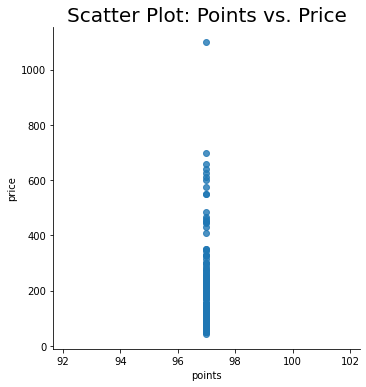

In [23]:
sns.lmplot('points', 'price', data=data, fit_reg=False)
plt.title('Scatter Plot: Points vs. Price', fontsize=20)

<AxesSubplot:title={'center':'Boxplot of Price Distribution by Points'}, xlabel='points', ylabel='price'>

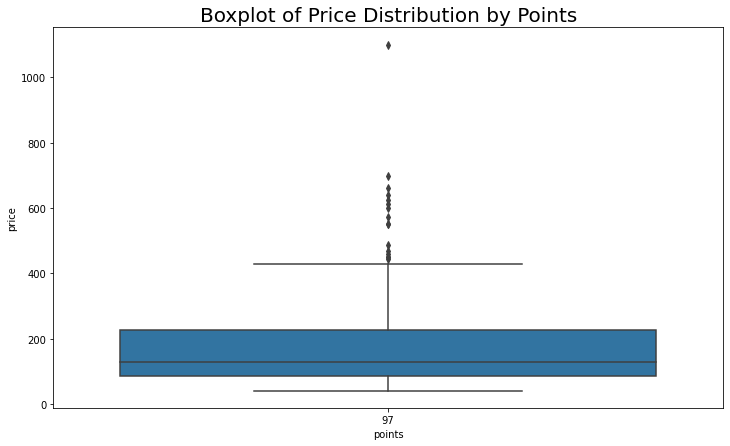

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Boxplot of Price Distribution by Points', fontsize=20)
sns.boxplot(x=data['points'], y=data['price'])

In [25]:
### Winery
How do prices varie between wineries.

SyntaxError: invalid syntax (<ipython-input-25-49fab5439e93>, line 2)

In [26]:
winery_1 = pd.DataFrame(data.groupby(['winery'])['price'].mean())
winery_1.columns = ['AvgPrice']

winery_2 = pd.DataFrame(data['winery'].value_counts())
winery_2.columns=['Wine Count']

winery_df = pd.concat([winery_1, winery_2], axis=1)
winery_df

,AvgPrice,Wine Count
Abeja,85.000000,1
Alpha Omega,130.000000,1
Altesino,125.000000,1
Antinori,115.000000,1
Arista,90.000000,1
...,...,...
Von Othegraven,250.000000,1
Von Strasser,100.000000,1
William FÃÂ¨vre,95.000000,1
Williams Selyem,80.111111,9


Text(0.5, 1.0, 'Scatter plot of Winery vs. Price')

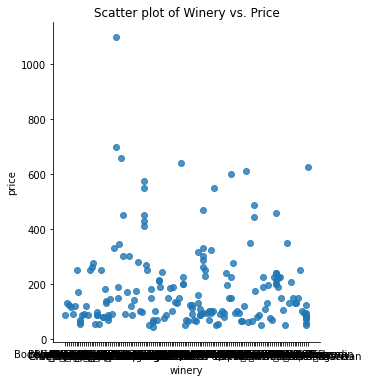

In [29]:
sns.lmplot('winery', 'price', data=data, fit_reg=False)
plt.title('Scatter plot of Winery vs. Price')

Text(0.5, 1.0, 'Average Price by Winery')

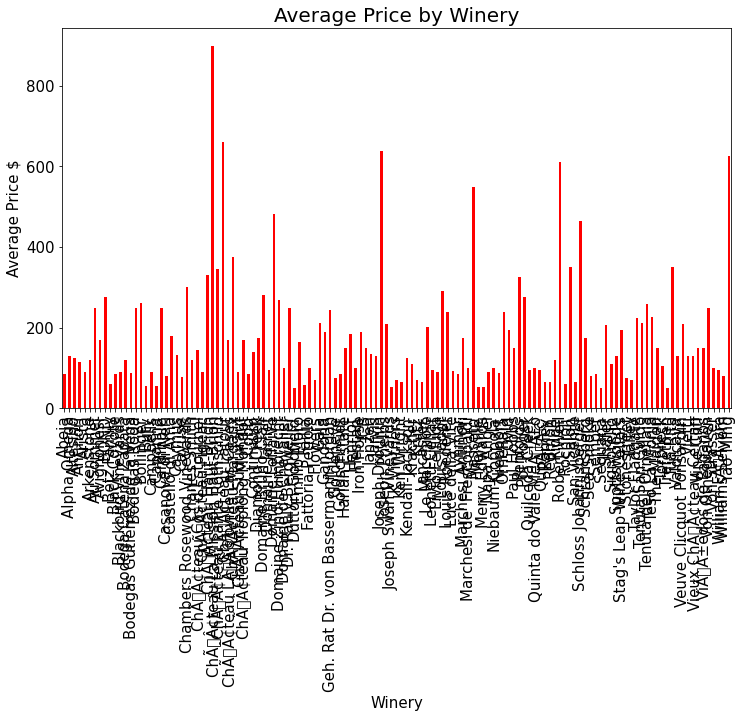

In [27]:
fig, ax = plt.subplots(figsize=(12,7))
winery_df['AvgPrice'].plot.bar(color='r')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Winery', fontsize=15)
plt.ylabel('Average Price $', fontsize=15)
plt.title('Average Price by Winery', fontsize=20)

In [ ]:
### Let's look at at the attributes
Is there a correlation between variety and price? En d'autre terms, does the variety an influence the price?

In [28]:
correlation = pd.DataFrame(data.groupby(['variety'])['price'].mean())
correlation.columns = ['AvgPrice']

correlation_1 = pd.DataFrame(data['variety'].value_counts())
correlation_1.columns=['Wine Count']

correlation_df = pd.concat([correlation, correlation_1], axis=1)
correlation_df

,AvgPrice,Wine Count
Bordeaux-style Red Blend,252.826087,23
Bordeaux-style White Blend,296.000000,3
Cabernet Blend,110.000000,1
Cabernet Franc,130.000000,1
Cabernet Sauvignon,141.444444,36
Champagne Blend,225.857143,7
Chardonnay,233.000000,16
Malbec,120.000000,1
Merlot,313.571429,7
Monastrell,88.000000,1


In [ ]:
## Findings

To be considered:

*1. Winery doesn't seem to provide a good indication of the price discrimination.

*2. Points does seem to do a good job of indicating higher average price. * 

*3. Wines from Bordeaux seem to have higher average prices vs. other parts of the world. However, most of the inventory is from California.* 

*4. The data appears to have a normal Distribution. *

